<center><h1>Calculating virial coefficients</h1></center>

This notebook contains an example of using the onsager library, which calculates the virial coefficients for a variety of hard particles (e.g. spheres, spheroids, cut-spheres).

<ul>
    <li>The user creates an particle object using onsager.particle, specifying the particle type and its dimensions.</li>
    <li>The function calc_virial will perform the virial calculation, calling a fortran subroutine.</li>
    <li>fit_func_virial will fit a function to the discrete virial results, such that we have the virial as a continuous function.</li>
</ul>

The library also can calculate the equation of state and find the coexistence densities between the isotropic and nematic phases.

Numpy and pandas are also required, as is matplotlib.pyplot, although that is called within the onsager library.

In [1]:
import numpy as np
import pandas as pd
import onsager

We shall test this on a spherocylinder with L=5 and D=1. First we create an object.

In [2]:
test = onsager.particle('spherocyl', [5.0,1.0])

Particle initialized as spherocyl with dimensions:
dim[0] = 5.0
dim[1] = 1.0
Particle volume is: 4.45058959259


Now we shall calculate the second virial coefficient, using 1,000,000 MC iterations, for 201 values of the nematic order parameter

In [3]:
test.calc_virial(orders=[2], iterations=[1000*1000], n_vals_in = 201, timing=True)

B2 complete: CPU time for 1000000.0 iterations:- 48.785028s


And now we fit a function to the data

In [4]:
test.fit_func_virial()

And plot the data (if a function has been fitted, it will also plot that). This function also shows the region around S_nem = 0 to S_nem = 0.2 in more detail. 

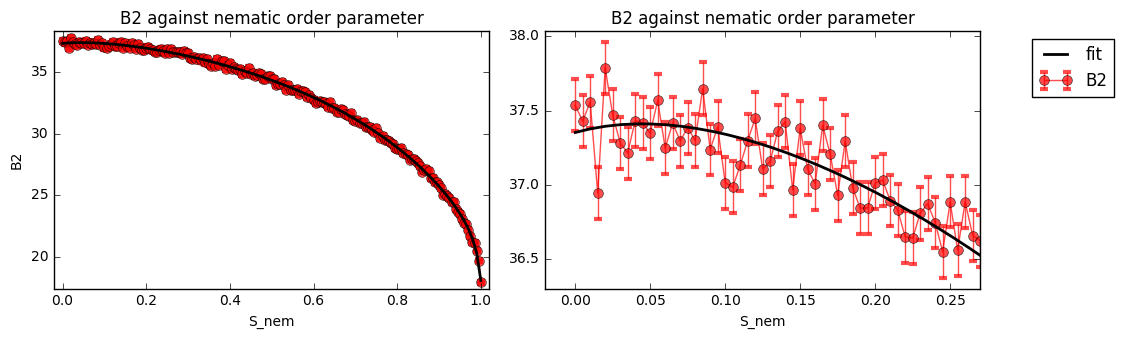

In [5]:
test.plot_virial([2])

We now calculate the equation of state (pressure, chemical potential and free energy against density, as well as the nematic order parameter), and output it to a file

In [6]:
test.calc_EOS()
test.output_EOS(filename="EOS_test.dat")

We can also output the virial coefficient itself

In [7]:
test.output_virial(filename="B2_test.dat")

We now plot the EOS, to get an idea of where we might find coexistence between the isotropic and nematic phases

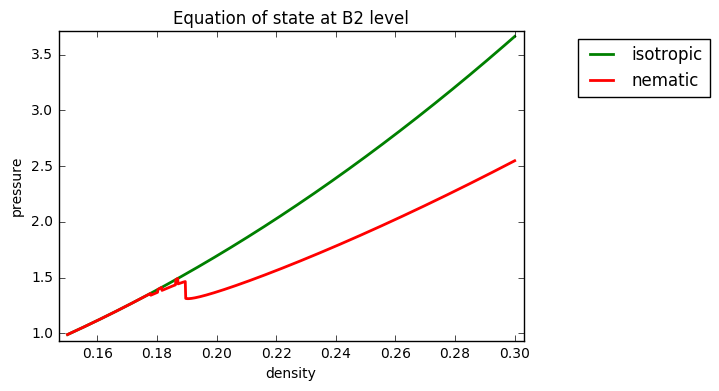

In [10]:
test.plot_EOS(rho_min = 0.15, rho_max = 0.3, order = 2, n_rho = 1000)

Now we have an idead of where we might find coexistence and we can now locate the coexistence densities, and output them

In [11]:
test.find_coex(rho_i=0.17, rho_n=0.25, order = 2, updates=False)
print(test.coex)
print(test.coex[(test.coex.S2!=0)].iloc[1:].empty)
test.output_coex(filename="coex_test.dat")

       rho_i     rho_n        S2      Pr_i      Pr_n       mu_i       mu_n  \
B2  0.181861  0.205129  0.802572  1.417255  1.417255  11.881592  11.881592   
B3  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B4  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B5  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B6  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B7  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B8  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   

       fe_i      fe_n  
B2  4.08854  4.972506  
B3  0.00000  0.000000  
B4  0.00000  0.000000  
B5  0.00000  0.000000  
B6  0.00000  0.000000  
B7  0.00000  0.000000  
B8  0.00000  0.000000  
True


And we can now plot the EOS again, this time the coexistence data will be included in the plot

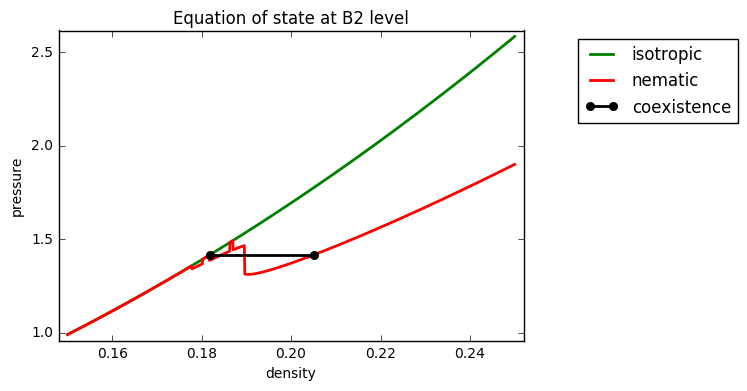

In [13]:
test.plot_EOS(rho_min = 0.15, rho_max = 0.25, order = 2, n_rho = 1000)

Notice that there is a lot of noise close to coexistence. We can run the virial calculation for more steps to fix this. Any new runs are added to the old data.

In [14]:
test.calc_virial(orders=[2], iterations=[3000*3000], n_vals_in = 201, timing=True)

B2 complete: CPU time for 9000000.0 iterations:- 438.921313s


And we repeat everything as before

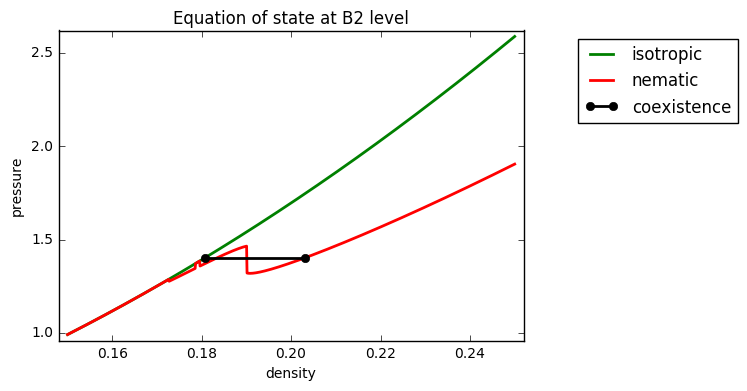

In [15]:
test.fit_func_virial()
test.calc_EOS()
test.find_coex(rho_i=0.17, rho_n=0.25, order = 2, updates=False)
test.plot_EOS(rho_min = 0.15, rho_max = 0.25, order = 2, n_rho = 1000)

Longer runs would held remove the noise still further. We can also add in some higher order terms.

In [18]:
test.calc_virial(orders=[2,3,4,5], iterations=[1000*200], n_vals_in = 201, timing=True)

B2 complete: CPU time for 200000.0 iterations:- 9.927802000000042s
B3 complete: CPU time for 200000.0 iterations:- 370.170844s
B4 complete: CPU time for 200000.0 iterations:- 554.5511369999999s
B5 complete: CPU time for 200000.0 iterations:- 744.2894319999998s


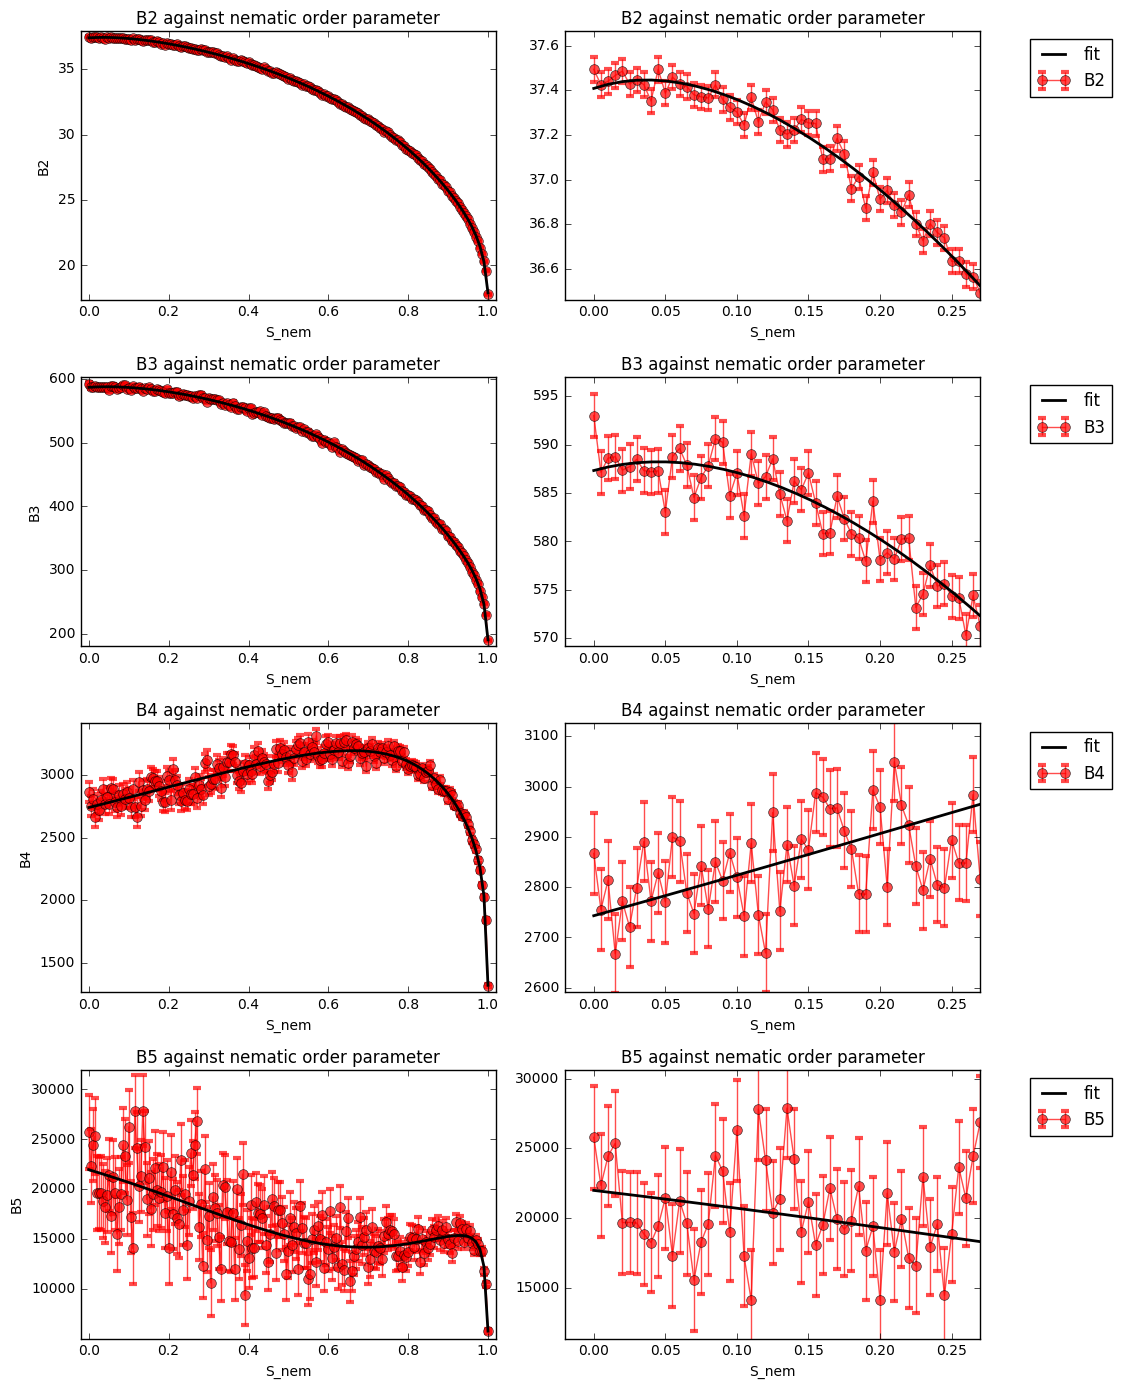

In [19]:
test.fit_func_virial()
test.plot_virial([2,3,4,5])

The errors get much larger for higher order terms, but we'll proceed for now calculating the EOS and coexistence densities

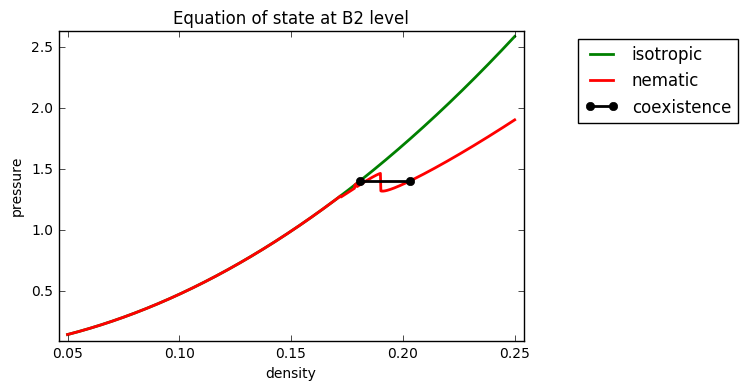

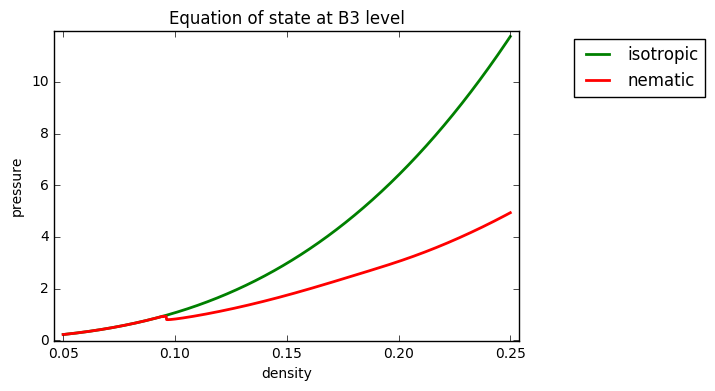

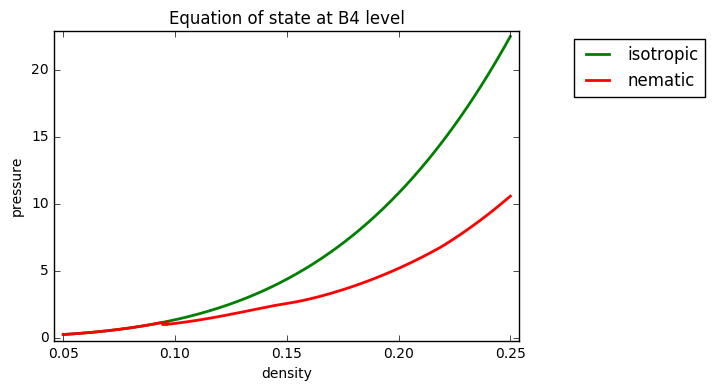

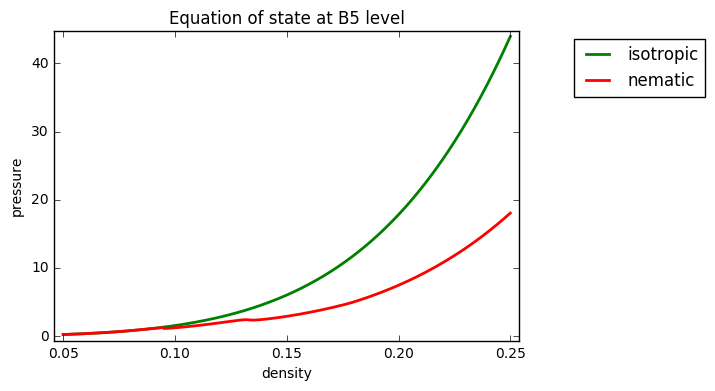

In [20]:
test.fit_func_virial()
for i in range(2,6):
    test.calc_EOS(order = i)
    test.plot_EOS(rho_min = 0.05, rho_max = 0.25, order = i, n_rho = 1000)

And now we check for coexistence

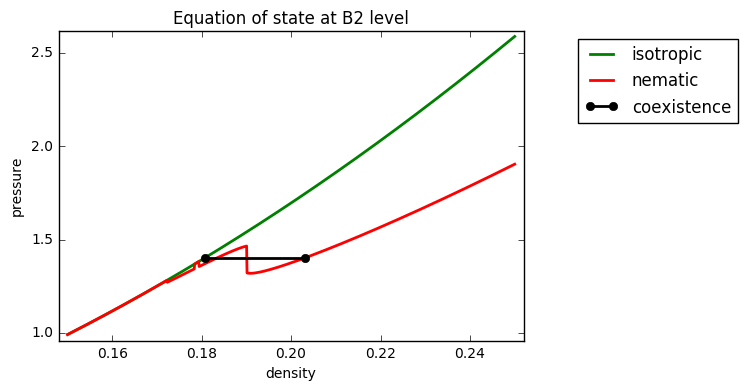

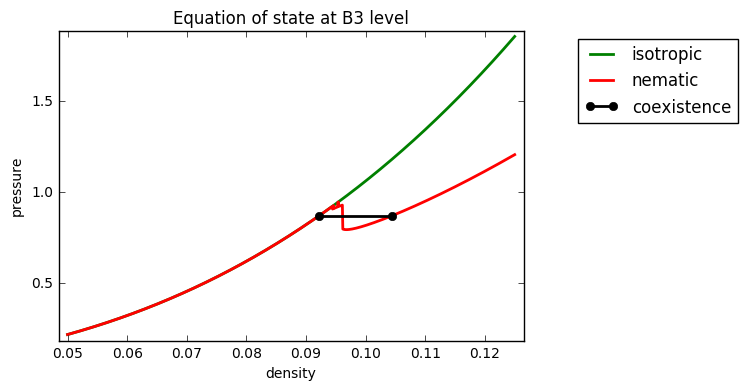

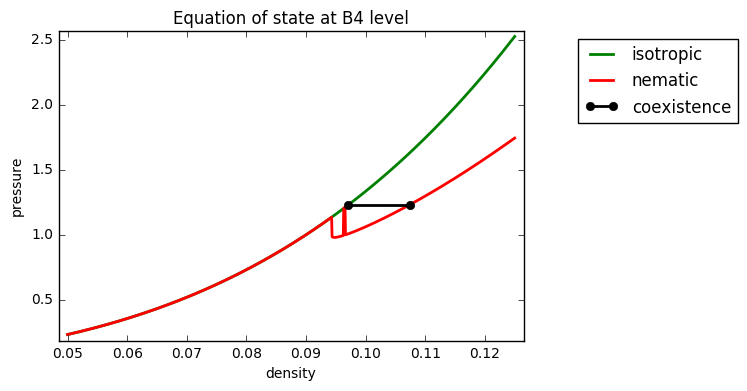

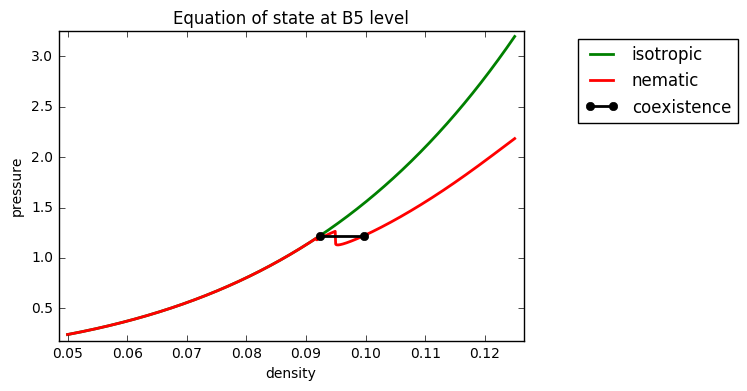

       rho_i     rho_n        S2      Pr_i      Pr_n       mu_i       mu_n  \
B2  0.180744  0.203145  0.792744  1.402817  1.402817  11.811987  11.811987   
B3  0.092232  0.104478  0.827381  0.871255  0.871255  12.011238  12.011238   
B4  0.097115  0.107382  0.895222  1.231860  1.231860  16.592730  16.592730   
B5  0.092327  0.099671  0.832987  1.220175  1.220175  16.909201  16.909201   
B6  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B7  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
B8  0.000000  0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   

        fe_i      fe_n  
B2  4.050658  4.906489  
B3  2.564851  3.672089  
B4  3.908125  5.120943  
B5  3.693415  4.667188  
B6  0.000000  0.000000  
B7  0.000000  0.000000  
B8  0.000000  0.000000  
False


In [23]:
for i in range(2,6):
    if i > 2:
        test.find_coex(rho_i=0.05, rho_n=0.125, order = i, updates=False)
        test.plot_EOS(rho_min = 0.05, rho_max = 0.125, order = i, n_rho = 1000)
    else:
        test.find_coex(rho_i=0.15, rho_n=0.25, order = i, updates=False)
        test.plot_EOS(rho_min = 0.15, rho_max = 0.25, order = i, n_rho = 1000)
    
print(test.coex)
print(test.coex[(test.coex.S2!=0)].iloc[1:].empty)
test.output_coex(filename="coex_test.dat")